# EDA

## Setup

In [1]:
import numpy as np
import pandas as pd
import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import sys
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set some options for printing all the columns
np.set_printoptions(precision = 10, threshold = sys.maxsize)
np.set_printoptions(linewidth = np.inf)

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
pd.set_option('precision', 10)

pd.options.display.float_format = '{:,.7}'.format

## Read Data

In [3]:
articles = pd.read_parquet('articles_20ss.parquet')
customers = pd.read_parquet('customers_20ss.parquet')
transactions = pd.read_parquet('transactions_20ss.parquet')

## Features

> ### transactions
shape       : 8,103,650 x 6  
foreign keys: customer_id (customers); article_id (articles)   
info        : all numerical values

In [4]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id,month,day
0,2020-03-01,-7200416642310594310,751628002,0.02201695,1,3,1
1,2020-03-01,8486166240428812738,675662028,0.03557627,2,3,1
2,2020-03-01,-761612008142234995,821152004,0.02540678,2,3,1
3,2020-03-01,-761612008142234995,860738001,0.02540678,2,3,1
4,2020-03-01,-1779128939320411371,822957002,0.04574576,2,3,1


In [5]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8103650 entries, 0 to 8103649
Data columns (total 7 columns):
 #   Column            Dtype         
---  ------            -----         
 0   t_dat             datetime64[ns]
 1   customer_id       int64         
 2   article_id        int64         
 3   price             float32       
 4   sales_channel_id  int8          
 5   month             int8          
 6   day               int8          
dtypes: datetime64[ns](1), float32(1), int64(2), int8(3)
memory usage: 239.6 MB


In [6]:
#msno.matrix(transactions)
transactions.isnull().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
month               0
day                 0
dtype: int64

<span style="color:darkred">**Notice: transactions have returned orders!!!**</span>

In [7]:
transactions[transactions.duplicated(keep=False)]

,t_dat,customer_id,article_id,price,sales_channel_id,month,day
9,2020-03-01,-7024693905701963300,794320006,0.04235593,2,3,1
10,2020-03-01,-7024693905701963300,794320006,0.04235593,2,3,1
19,2020-03-01,5199955052963697108,851866001,0.06584746,2,3,1
20,2020-03-01,5199955052963697108,851866001,0.06584746,2,3,1
24,2020-03-01,3051518411062988268,579302001,0.03388136,2,3,1
...,...,...,...,...,...,...,...
8103625,2020-08-31,3716388476797598507,931769003,0.04235593,2,8,31
8103626,2020-08-31,3716388476797598507,715624013,0.02540678,2,8,31
8103627,2020-08-31,3716388476797598507,715624013,0.02540678,2,8,31
8103628,2020-08-31,3716388476797598507,715624053,0.02540678,2,8,31


#### 1. customer_id
- may dive into customers' info

In [8]:
num_customers = transactions.customer_id.nunique()

print(f"There are {num_customers} customeres in total. \n\
Assuming on average, a customer has {round(transactions.shape[0]/num_customers,2)} purchases.")

There are 741661 customeres in total. 
Assuming on average, a customer has 10.93 purchases.


In [9]:
trans_per_cus_df = transactions.customer_id.value_counts().sort_values(ascending = False).reset_index().rename(columns = {'index':'customer_id','customer_id':'cnt'})
trans_per_cus_df

,customer_id,cnt
0,-4137963391721325,626
1,-6030179180003346623,553
2,5854009424779598107,531
3,4111181464026910813,524
4,-7809212811262987408,523
...,...,...
741656,-6826260019360104797,1
741657,-986927141802711131,1
741658,-8697328286204121985,1
741659,-3473019032615275217,1


In [10]:
trans_per_cus_df.describe()

,customer_id,cnt
count,"741,661.0","741,661.0"
mean,-1.142701e+16,10.92635
std,5.325942e+18,14.39862
min,-9.223353e+18,1.0
25%,-4.626033e+18,3.0
50%,-1.495514e+16,6.0
75%,4.597675e+18,13.0
max,9.223148e+18,626.0


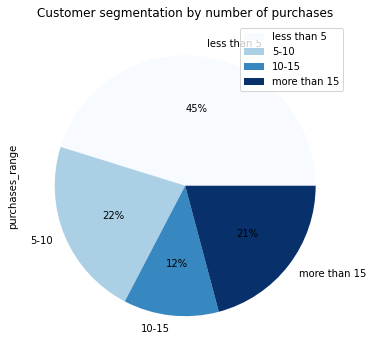

In [11]:
trans_per_cus_df['purchases_range'] = pd.cut(trans_per_cus_df.cnt, [0,5,10,15,630],labels=['less than 5','5-10','10-15','more than 15'])
trans_per_cus_df.purchases_range.value_counts().sort_index().plot.pie(title = "Customer segmentation by number of purchases",
                                                                      legend = True, autopct='%1.0f%%', fontsize=10, colormap = 'Blues',
                                                                      figsize=(6,6))
None

In [12]:
# 73549
print(f"{round(trans_per_cus_df[trans_per_cus_df.cnt == 1].shape[0]/num_customers*100,2)}% of customers only have 1 purchase.")

9.92% of customers only have 1 purchase.


#### 2. article_id
- may dive into articles' info

In [13]:
article_purchased_freq = transactions.article_id.value_counts().sort_values(ascending=False).reset_index().rename(columns = {'index':'article','article_id':'cnt'})
article_purchased_freq

,article,cnt
0,706016001,12252
1,610776002,11213
2,759871002,10343
3,610776001,9517
4,599580038,9499
...,...,...
50594,500153009,1
50595,619241002,1
50596,576341001,1
50597,742262001,1


In [14]:
# top 10 items to be purchased
article_purchased_freq.head(10)

,article,cnt
0,706016001,12252
1,610776002,11213
2,759871002,10343
3,610776001,9517
4,599580038,9499
5,599580055,9337
6,372860002,8983
7,841383002,8692
8,751471001,8459
9,741356002,8380


#### 3. price
- log scale

In [15]:
transactions.price.describe()

count   8.10365e+06
mean     0.02648948
std      0.01618386
min     3.38983e-05
25%      0.01628814
50%      0.02438983
75%      0.03388136
max       0.5067797
Name: price, dtype: float64

In [16]:
customer_spending_df = transactions.groupby(['customer_id']).price.agg(['sum','count','mean']).sort_values(by='mean',ascending=False).reset_index()
customer_spending_df

,customer_id,sum,count,mean
0,2707728978571693688,1.013559,2,0.5067797
1,-9201204845672537187,1.266102,3,0.4220339
2,-3947652016126073184,0.4220339,1,0.4220339
3,-7683113318005258952,0.4220339,1,0.4220339
4,-3303478304351630084,1.055085,3,0.3516949
...,...,...,...,...
741656,1764701961159360523,0.0008474576,1,0.0008474576
741657,3201249035369549730,0.0008474576,1,0.0008474576
741658,-5978354700334852920,0.001661017,2,0.0008305085
741659,-2356417147797938302,0.0008135593,1,0.0008135593


In [17]:
customer_spending_df.describe()

,customer_id,sum,count,mean
count,"741,661.0","741,661.0","741,661.0","741,661.0"
mean,-1.142701e+16,0.288241,10.92635,0.02689859
std,5.325942e+18,0.4161853,14.39862,0.01208835
min,-9.223353e+18,0.0008135593,1.0,0.000279661
25%,-4.626033e+18,0.06861017,3.0,0.01961582
50%,-1.495514e+16,0.1561864,6.0,0.02501564
75%,4.597675e+18,0.3411017,13.0,0.03162147
max,9.223148e+18,26.13324,626.0,0.5067797


<AxesSubplot:xlabel='count', ylabel='sum'>

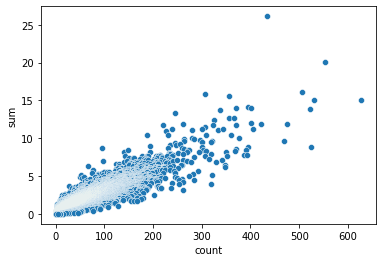

In [18]:
sns.scatterplot(x='count',y='sum',data = customer_spending_df)
# -> upper triangle: customers buy products with higher prices
# -> lower triangle: customers buy products with lower prices. [more]

#### 4. sales_channel_id
- 1/2 : online/offline

2    6019825
1    2083825
Name: sales_channel_id, dtype: int64


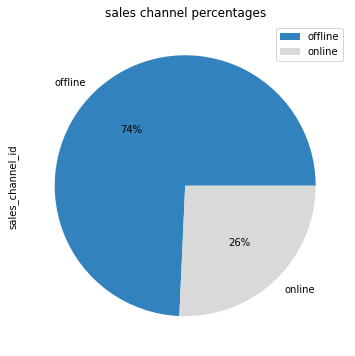

In [19]:
sales_channels_df = transactions.sales_channel_id.value_counts()
print(sales_channels_df)

sales_channels_df.plot.pie(title = "sales channel percentages",legend = True, labels=['offline','online'],
                           autopct='%1.0f%%', fontsize=10, colormap = 'tab20c',figsize=(6,6))
None

In [20]:
customer_channel_preference_df = transactions.groupby(['customer_id','sales_channel_id']).size()

customer_channel_preference_df

customer_id           sales_channel_id
-9223352921020755230  1                    2
-9223343869995384291  2                   26
-9223295149301589789  2                    7
-9223293121067732640  1                    1
                      2                    8
                                          ..
 9223099843213569889  2                   43
 9223103796055095238  2                    2
 9223108375636425507  2                    5
 9223144259947635662  1                    6
 9223148401910457466  1                   15
Length: 932082, dtype: int64

In [21]:
online_transactions = transactions[transactions.sales_channel_id == 1]
offline_transactions = transactions[transactions.sales_channel_id == 2]


mask = (transactions['customer_id'].isin(online_transactions['customer_id']) & transactions['customer_id'].isin(offline_transactions['customer_id']))
purchase_both_channels = transactions[mask]

mask = online_transactions['customer_id'].isin(purchase_both_channels['customer_id'])
purchase_only_online = online_transactions[~mask]

mask = offline_transactions['customer_id'].isin(purchase_both_channels['customer_id'])
purchase_only_offline = offline_transactions[~mask]

In [22]:
#sns.countplot(data=purchase_both_channels,x='customer_id', hue='sales_channel_id')
#purchase_both_channels.groupby(['customer_id','sales_channel_id']).size().unstack('sales_channel_id').plot.bar()

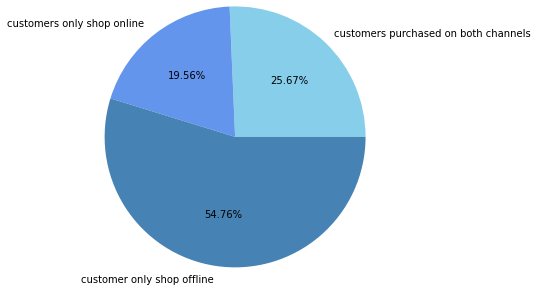

In [23]:
cus_both_channel = purchase_both_channels.customer_id.nunique()
cus_online = purchase_only_online.customer_id.nunique()
cus_offline = purchase_only_offline.customer_id.nunique()

assert cus_both_channel+cus_online+cus_offline == num_customers, "wrong segmentation"


plt.pie([cus_both_channel/num_customers, cus_online/num_customers, cus_offline/num_customers], 
        labels = ['customers purchased on both channels', 'customers only shop online ', 'customer only shop offline'], 
        colors = ['skyblue', 'cornflowerblue', 'steelblue'], radius = 1.5, autopct='%.2f%%')
plt.show()

Among all customers, 20% only shop online, 55% only shop offline, and 25% shop on both channels

#### 5. month & day

> Month & day are not quite useful for what we do for recommending items, and there is no tendency on orders purchasing along with date.  
> May get top 5 purchased articles by month: most popular items (recommending)

<AxesSubplot:xlabel='month', ylabel='cnt'>

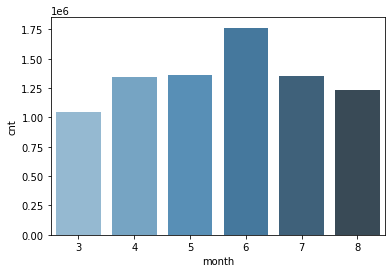

In [24]:
month_df = transactions.groupby('month').size().reset_index().rename(columns={0:'cnt'})
sns.barplot(data=month_df, x="month", y="cnt", palette="Blues_d")

<AxesSubplot:title={'center':'August'}, xlabel='day'>

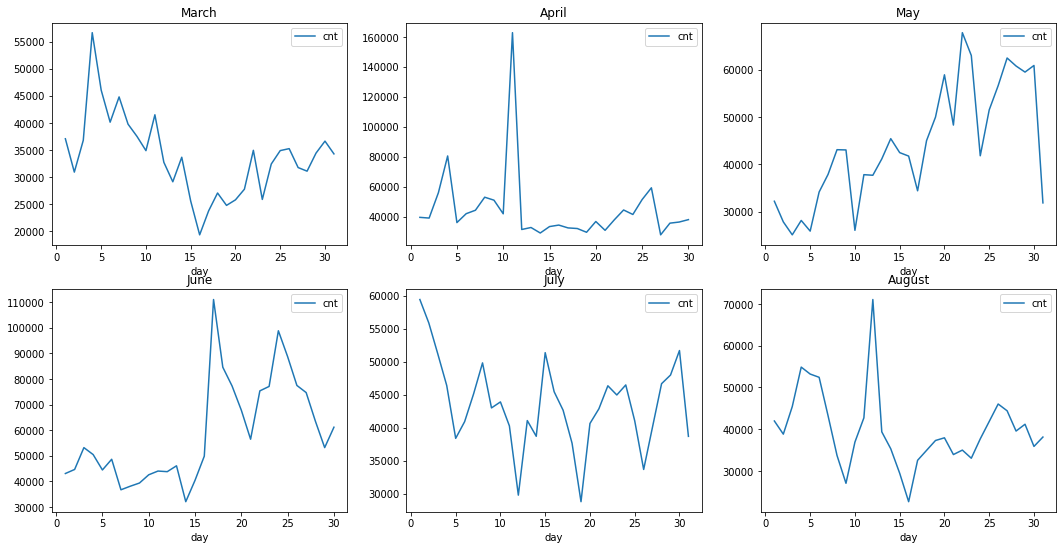

In [25]:
days_df = transactions.groupby(['month','day']).size().reset_index().rename(columns={0:'cnt'})

fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(18,9))

days_df[days_df.month==3].plot(kind = 'line', x='day',y='cnt', title='March', ax=axes[0,0])
days_df[days_df.month==4].plot(kind = 'line', x='day',y='cnt', title='April', ax=axes[0,1])
days_df[days_df.month==5].plot(kind = 'line', x='day',y='cnt', title='May', ax=axes[0,2])
days_df[days_df.month==6].plot(kind = 'line', x='day',y='cnt', title='June', ax=axes[1,0])
days_df[days_df.month==7].plot(kind = 'line', x='day',y='cnt', title='July', ax=axes[1,1])
days_df[days_df.month==8].plot(kind = 'line', x='day',y='cnt', title='August', ax=axes[1,2])

#### Top 5 articles by each month

In [26]:
for m in [3,4,5,6,7,8]:
    print(f"****************** month: {m} *****************")
    print(transactions[transactions.month == m].article_id.value_counts().head(5))
    
# could link to images for further analysis

****************** month: 3 *****************
706016001    2960
720125001    2074
762846007    1836
706016002    1794
841260013    1792
Name: article_id, dtype: int64
****************** month: 4 *****************
599580055    5154
610776002    3587
741356002    3528
559630026    3096
610776001    3070
Name: article_id, dtype: int64
****************** month: 5 *****************
684209027    2448
599580052    2381
599580038    2360
741356002    2275
688537004    2210
Name: article_id, dtype: int64
****************** month: 6 *****************
817472002    2994
599580038    2594
817472005    2259
599580052    2219
759871002    2159
Name: article_id, dtype: int64
****************** month: 7 *****************
706016001    1999
372860002    1971
730683050    1812
866383006    1781
610776002    1777
Name: article_id, dtype: int64
****************** month: 8 *****************
916468003    2328
751471001    2093
706016001    1957
918292001    1917
866731001    1587
Name: article_id, dtype: int6

## Data Cleaning

### 1. Delete returned orders

> H&M return policy(30days):  
> https://www2.hm.com/en_in/customer-service/returns.html

Assumptions:  
**1. If in 30 days two same purchases are found(including price) -> larger probability of returned order -> keep None**  
2. If in 30 days multiple same purchases are found(same day) -> larger probability of resale items -> keep One/All;  
3. If in 30 days multiple same purchases are found(different days) -> larger probability of neccessaries -> keep All

In [4]:
# get all possible duplicated orders
returned = transactions[transactions.duplicated(subset=['customer_id','article_id','price'], keep=False)].reset_index() # 1,642,987 x 7

# group all duplicated orders
grouped_returned_df = returned.groupby(['customer_id','article_id','price']).agg({'t_dat':['first','last','count'],'index':lambda x: list(x)}).reset_index()
grouped_returned_df['days_gap'] = grouped_returned_df['t_dat','last'] - grouped_returned_df['t_dat','first']

In [7]:
grouped_returned_df.head()

customer_id article_id      price      t_dat                                                  index days_gap
                                                  first       last count                              <lambda>         
0 -9223295149301589789  826620001 0.02879661 2020-04-20 2020-04-26     4  [1967644, 1967645, 2222156, 2222157]   6 days
1 -9223295149301589789  879294004 0.02032203 2020-04-26 2020-04-26     2                    [2222158, 2222159]   0 days
2 -9223293121067732640  866383008 0.01927119 2020-06-24 2020-06-24     2                    [5050691, 5050692]   0 days
3 -9223290575350349271  733067001 0.01354237 2020-04-26 2020-04-26     2                    [2202782, 2202783]   0 days
4 -9223167985496252139  160442007 0.01354237 2020-06-16 2020-06-16     2                    [4399575, 4399576]   0 days

In [48]:
eda_transactions = transactions.copy()
eda_transactions['Possible types'] = "normal order"

In [49]:
# assumption1
ddl = datetime.timedelta(days=30)
assump1 = grouped_returned_df[(grouped_returned_df.days_gap <= ddl) & (grouped_returned_df['t_dat','count'] == 2)]
eda_transactions.loc[eda_transactions.index.isin(assump1.explode(('index','<lambda>'))['index','<lambda>']), 
                     "Possible types"] = "has 2 duplicates \n within 30 days"

# assumption2
assump2 = grouped_returned_df[(grouped_returned_df.days_gap <= ddl) & (grouped_returned_df['t_dat','count'] > 2)]
eda_transactions.loc[eda_transactions.index.isin(assump2.explode(('index','<lambda>'))['index','<lambda>']), 
                     "Possible types"] = "has >2 duplicates \n within 30 days"

# assumption3
assump3 = grouped_returned_df[(grouped_returned_df.days_gap > ddl) & (grouped_returned_df['t_dat','count'] > 2)]
eda_transactions.loc[eda_transactions.index.isin(assump3.explode(('index','<lambda>'))['index','<lambda>']), 
                     "Possible types"] = "has >2 duplicates \n exceed 30 days"

<AxesSubplot:>

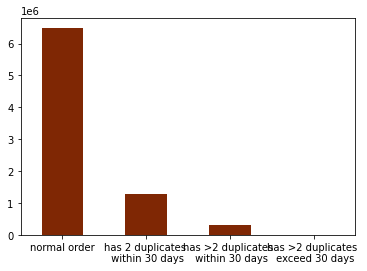

In [68]:
eda_transactions['Possible types'].value_counts().plot(kind='bar',rot = 0, cmap = 'Oranges_r',figsize = (6,4))

In [69]:
vis_returned_types = eda_transactions['Possible types'].value_counts().reset_index().rename(columns={'index':'Types','Possible types':'cnt'})

Text(0.5, 1.0, 'Possible types of orders')

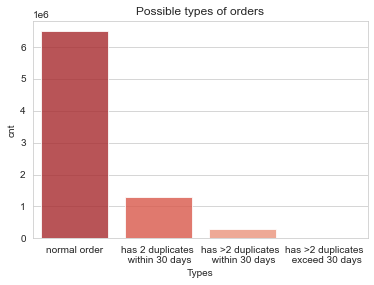

In [81]:
sns.barplot(data = vis_returned_types,x='Types',y = 'cnt',palette = 'Reds_r',alpha = 0.8)
sns.set_style('darkgrid')
plt.title('Possible types of orders')

<AxesSubplot:ylabel='Possible types'>

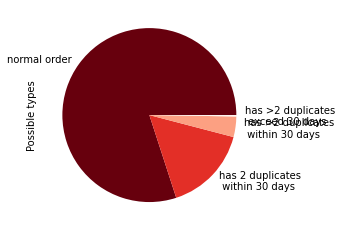

In [67]:
eda_transactions['Possible types'].value_counts().plot(kind='pie', cmap = 'Reds_r',figsize = (6,4))

In [5]:
grouped_returned_df['days_gap'].describe() # mostly are returned on the same day they were bought

count                        750510
mean      2 days 15:16:32.493104688
std      11 days 11:21:14.716320697
min                 0 days 00:00:00
25%                 0 days 00:00:00
50%                 0 days 00:00:00
75%                 0 days 00:00:00
max               182 days 00:00:00
Name: days_gap, dtype: object

In [6]:
# cleaning: days_gap <= 30 & count == 2
ddl = datetime.timedelta(days=30)
orders_tobe_cleaned = grouped_returned_df[(grouped_returned_df.days_gap <= ddl) & (grouped_returned_df['t_dat','count'] == 2)]

mask = transactions.index.isin(orders_tobe_cleaned.explode(('index','<lambda>'))['index','<lambda>'])
transactions = transactions[~mask]

In [7]:
#tmp = transactions[~mask]
#tmp[(tmp.customer_id == -9223295149301589789) & (tmp.article_id == 879294004)]

# --> empty  checked!

### 2. articles
> need to clean for a maching code & name (optional)  
> need to clean for filtering major features -> find similarities

In [8]:
#print(articles.isnull().sum())
#sns.heatmap(articles.isnull())

In [9]:
#assert articles.product_code.nunique() == articles.prod_name.nunique(), "product_code != product_name"

In [10]:
# eg.
articles[articles.product_code == 188183].prod_name.unique()

array(['Spanx alot shape Swimsuit', 'SPANX ALOT swimsuit (1)', 'Spanx alot Swimsuit'], dtype=object)

In [11]:
#assert articles.product_type_no.nunique() == articles.product_type_name.nunique(), "product_type_no != product_type_name"

In [12]:
# found
articles[articles.product_type_name == 'Umbrella'].product_type_no.unique()

array([532,  83])

In [13]:
#assert articles.department_no.nunique() == articles.department_name.nunique(), "department_no != department_name"

In [14]:
# eg.
articles[articles.department_name=='Accessories'].department_no.unique()

array([9985, 3510, 7530, 3941])

<span style="color:darkred"> name & code doesnt match -> prefer only use names</span>

#### 2.1. Data Cleaning - colors

In [15]:
articles.perceived_colour_master_name.unique()

array(['Black', 'White', 'Beige', 'Blue', 'Grey', 'Mole', 'Orange', 'Metal', 'Lilac Purple', 'Brown', 'Pink', 'Red', 'Green', 'Khaki green', 'undefined', 'Turquoise', 'Yellow', 'Unknown', 'Yellowish Green', 'Bluish Green'], dtype=object)

In [16]:
# Deal with Unknown first
articles.loc[articles.perceived_colour_master_name == 'Unknown','perceived_colour_master_name'] =\
articles.loc[articles.perceived_colour_master_name == 'Unknown','colour_group_name']

articles.loc[articles.article_id == 592986010,'perceived_colour_master_name'] = 'Dark Grey'
articles.loc[articles.article_id == 696124001,'perceived_colour_master_name'] = 'Black'
articles.loc[articles.article_id == 696124002,'perceived_colour_master_name'] = 'Pink'
articles.loc[articles.article_id == 696500001,'perceived_colour_master_name'] = 'Black'
articles.loc[articles.article_id == 719216001,'perceived_colour_master_name'] = 'Green'
articles.loc[articles.article_id == 719243002,'perceived_colour_master_name'] = 'Pink'
articles.loc[articles.article_id == 721472001,'perceived_colour_master_name'] = 'White'
articles.loc[articles.article_id == 730292001,'perceived_colour_master_name'] = 'Black'

In [17]:
# Deal with undefined (37)
from scipy.spatial import KDTree
from webcolors import (
    CSS3_HEX_TO_NAMES,
    hex_to_rgb,
)
def convert_rgb_to_names(rgb_tuple):   
    # a dictionary of all the hex and their respective names in css3
    css3_db = CSS3_HEX_TO_NAMES
    names = []
    rgb_values = []
    for color_hex, color_name in c:
        names.append(color_name)
        rgb_values.append(hex_to_rgb(color_hex))
    
    kdt_db = KDTree(rgb_values)
    distance, index = kdt_db.query(rgb_tuple)
    return names[index]

In [18]:
# update CSS#_HEX_TO_NAME.items()
c=[
('#f0f8ff', 'Blue'), ('#faebd7', 'White'), ('#00ffff', 'Blue'), ('#7fffd4', 'Blue'), ('#f0ffff', 'Blue'), 
('#f5f5dc', 'White'), ('#ffe4c4', 'White'), ('#000000', 'Black'), ('#ffebcd', 'White'), ('#0000ff', 'Blue'), ('#8a2be2', 'Purple'), 
('#a52a2a', 'Brown'), ('#deb887', 'Brown'), ('#5f9ea0', 'Blue'), ('#7fff00', 'Green'), ('#d2691e', 'Brown'), ('#ff7f50', 'Orange'), 
('#6495ed', 'Blue'), ('#fff8dc', 'Yellow'), ('#dc143c', 'Red'), ('#00008b', 'Blue'), ('#008b8b', 'Blue'), ('#b8860b', 'Yellow'),
('#a9a9a9', 'Grey'), ('#006400', 'Green'), ('#bdb76b', 'Khaki green'), ('#8b008b', 'Purple'), ('#556b2f', 'Khaki green'), 
('#ff8c00', 'Orange'), ('#9932cc', 'Purple'), ('#8b0000', 'Red'), ('#e9967a', 'Orange'), ('#8fbc8f', 'Green'), 
('#483d8b', 'Blue'), ('#2f4f4f', 'Green'), ('#00ced1', 'Bluish Green'), ('#9400d3', 'Purple'), ('#ff1493', 'Pink'), 
('#00bfff', 'Blue'), ('#696969', 'Grey'), ('#1e90ff', 'Blue'), ('#b22222', 'Red'), ('#fffaf0', 'White'), 
('#228b22', 'Green'), ('#ff00ff', 'Purple'), ('#dcdcdc', 'White'), ('#f8f8ff', 'White'), ('#ffd700', 'Metal'), ('#daa520', 'Metal'), 
('#808080', 'gray'), ('#008000', 'green'), ('#adff2f', 'Green'), ('#f0fff0', 'Green'), ('#ff69b4', 'Pink'), ('#cd5c5c', 'Red'), 
('#4b0082', 'Purple'), ('#fffff0', 'White'), ('#f0e68c', 'Yellow'), ('#e6e6fa', 'White'), ('#fff0f5', 'White'), ('#7cfc00', 'Green'), 
('#fffacd', 'White'), ('#add8e6', 'Blue'), ('#f08080', 'Red'), ('#e0ffff', 'Blue'), ('#fafad2', 'Yellow'), 
('#d3d3d3', 'Grey'), ('#90ee90', 'Green'), ('#ffb6c1', 'Pink'), ('#ffa07a', 'Orange'), ('#20b2aa', 'Bluish Green'), 
('#87cefa', 'Blue'), ('#778899', 'Gray'), ('#b0c4de', 'Blue'), ('#ffffe0', 'Yellow'), ('#00ff00', 'Green'), 
('#32cd32', 'Green'), ('#faf0e6', 'White'), ('#800000', 'Red'), ('#66cdaa', 'Green'), ('#0000cd', 'Blue'), 
('#ba55d3', 'Purple'), ('#9370db', 'Purple'), ('#3cb371', 'Green'), ('#7b68ee', 'Purple'), ('#00fa9a', 'Green'), 
('#48d1cc', 'Green'), ('#c71585', 'Pink'), ('#191970', 'Blue'), ('#f5fffa', 'White'), ('#ffe4e1', 'Pink'), 
('#ffe4b5', 'Yellow'), ('#ffdead', 'Yellow'), ('#000080', 'Blue'), ('#fdf5e6', 'White'), ('#808000', 'Green'), ('#6b8e23', 'Green'), 
('#ffa500', 'orange'), ('#ff4500', 'Orange'), ('#da70d6', 'Purple'), ('#eee8aa', 'White'), ('#98fb98', 'Green'), ('#afeeee', 'Blue'),
('#db7093', 'Pink'), ('#ffefd5', 'White'), ('#ffdab9', 'White'), ('#cd853f', 'Brown'), ('#ffc0cb', 'pink'), ('#dda0dd', 'Purple'), 
('#b0e0e6', 'Blue'), ('#800080', 'Purple'), ('#ff0000', 'Red'), ('#bc8f8f', 'Pink'), ('#4169e1', 'Blue'), ('#8b4513', 'Brown'), 
('#fa8072', 'Orange'), ('#f4a460', 'Brown'), ('#2e8b57', 'Green'), ('#fff5ee', 'White'), ('#a0522d', 'Orange'), ('#c0c0c0', 'Metal'), 
('#87ceeb', 'Blue'), ('#6a5acd', 'Purple'), ('#708090', 'Grey'), ('#fffafa', 'White'), ('#00ff7f', 'Green'), ('#4682b4', 'Blue'), 
('#d2b48c', 'Brown'), ('#008080', 'Green'), ('#d8bfd8', 'Purple'), ('#ff6347', 'Orange'), ('#40e0d0', 'Green'), ('#ee82ee', 'Purple'), ('#f5deb3', 'White'), 
('#ffffff', 'white'), ('#f5f5f5', 'White'), ('#ffff00', 'Yellow'), ('#9acd32', 'Yellowish Green')
]

In [19]:
from PIL import Image
from colorthief import ColorThief
from webcolors import rgb_to_name

undefined_articles = ['0'+str(i) for i in articles[articles.perceived_colour_master_name == 'undefined'].article_id]

for i in undefined_articles:
    idx = i[:3]
    directory = 'images_512_512/'+idx+'/'+i+'.jpg'
    #img = Image.open(directory)
    #colors = img.convert('RGB').getcolors()
    color_thief = ColorThief(directory)
    dominant_color = color_thief.get_color(quality=1)
    find_color = convert_rgb_to_names(dominant_color)
    #print(i[1:],find_color)
    articles.loc[articles.article_id == int(i[1:]),'perceived_colour_master_name'] = find_color

In [20]:
articles.loc[articles.perceived_colour_master_name == 'Yellowish Green','perceived_colour_master_name'] = 'Green'
articles.loc[articles.perceived_colour_master_name == 'Bluish Green',   'perceived_colour_master_name'] = 'Green'
articles.loc[articles.perceived_colour_master_name == 'Dark Blue',      'perceived_colour_master_name'] = 'Blue'

#{'Turquoise':'Blue','Mole':'Brown','Lilac Purple':'Purple','Dark Grey':'Grey','Off White':'White','Light Grey':'Grey'} -> classify
articles.loc[articles.perceived_colour_master_name == 'Turquoise',   'perceived_colour_master_name'] = 'Blue'
articles.loc[articles.perceived_colour_master_name == 'Mole',        'perceived_colour_master_name'] = 'Brown'
articles.loc[articles.perceived_colour_master_name == 'Lilac Purple','perceived_colour_master_name'] = 'Purple'
articles.loc[articles.perceived_colour_master_name == 'Dark Grey',   'perceived_colour_master_name'] = 'Grey'
articles.loc[articles.perceived_colour_master_name == 'Off White',   'perceived_colour_master_name'] = 'White'
articles.loc[articles.perceived_colour_master_name == 'Light Grey',  'perceived_colour_master_name'] = 'Grey'

In [21]:
articles.drop(['colour_group_code', 'colour_group_name','perceived_colour_value_id','perceived_colour_value_name','perceived_colour_master_id'], 
              axis=1, inplace=True)

#### 2.2. Data Cleaning - appearance

In [22]:
articles.graphical_appearance_name.unique() # Unknown, Other pattern, Other Structure

array(['Solid', 'Melange', 'All over pattern', 'Transparent', 'Metallic', 'Stripe', 'Dot', 'Contrast', 'Treatment', 'Glittering/Metallic', 'Placement print', 'Other pattern', 'Denim', 'Other structure', 'Application/3D', 'Chambray', 'Mixed solid/pattern', 'Check', 'Colour blocking', 'Front print', 'Lace', 'Slub', 'Embroidery', 'Argyle', 'Mesh', 'Jacquard', 'Neps', 'Sequin', 'Unknown', 'Hologram'], dtype=object)

In [23]:
articles.graphical_appearance_name.value_counts()

Solid                  25409
All over pattern        8180
Denim                   2836
Melange                 2518
Stripe                  2245
Front print             1094
Placement print         1094
Check                    975
Other structure          810
Lace                     705
Colour blocking          689
Embroidery               565
Mixed solid/pattern      565
Application/3D           474
Glittering/Metallic      373
Dot                      358
Sequin                   308
Jacquard                 303
Treatment                202
Other pattern            181
Metallic                 171
Contrast                 170
Chambray                 140
Mesh                      73
Slub                      66
Transparent               47
Neps                      28
Unknown                   10
Hologram                   7
Argyle                     3
Name: graphical_appearance_name, dtype: int64

In [24]:
unknown_apperances = ['0'+str(i) for i in articles[articles.graphical_appearance_name == 'Unknown'].article_id]

for i in unknown_apperances:
    idx = i[:3]
    directory = 'images_512_512/'+idx+'/'+i+'.jpg'
    img = Image.open(directory)
    #img.show()

In [25]:
articles.loc[articles.article_id == 572582012,'graphical_appearance_name'] = 'Solid'
articles.loc[articles.article_id == 580769001,'graphical_appearance_name'] = 'Solid'
articles.loc[articles.article_id == 592986010,'graphical_appearance_name'] = 'Solid'
articles.loc[articles.article_id == 696124001,'graphical_appearance_name'] = 'Mixed solid/pattern'
articles.loc[articles.article_id == 696124002,'graphical_appearance_name'] = 'Solid'
articles.loc[articles.article_id == 696500001,'graphical_appearance_name'] = 'Lace'
articles.loc[articles.article_id == 719216001,'graphical_appearance_name'] = 'Stripe'
articles.loc[articles.article_id == 719243002,'graphical_appearance_name'] = 'Lace'
articles.loc[articles.article_id == 721472001,'graphical_appearance_name'] = 'Lace'
articles.loc[articles.article_id == 730292001,'graphical_appearance_name'] = 'Front print'

In [26]:
articles[articles.graphical_appearance_name == 'Unknown']

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc


In [27]:
articles.drop(['graphical_appearance_no'], axis = 1, inplace = True)

#### 2.3. Data Cleaning - types

> index_group_name :keep  
> product_group_name/garment_group_name: find important   

##### 2.3.1. product_group_name

In [28]:
# Underwear/nightwear: baby & Underwear & Nightwear: ladies/men

# Interior textile(towel cape(1)), Furniture(laundry bags), Stationery(markers), Garment and Shoe care(laundry bags, sewing kit, zippers) 
#    -> Items (umbrella, phone case, wallet, airpod cases)
articles.loc[articles.product_group_name == 'Interior textile',     'product_group_name'] = 'Items'
articles.loc[articles.product_group_name == 'Furniture',            'product_group_name'] = 'Items'
articles.loc[articles.product_group_name == 'Stationery',           'product_group_name'] = 'Items'
articles.loc[articles.product_group_name == 'Garment and Shoe care','product_group_name'] = 'Items'

# Unknown
articles.loc[((articles.product_group_name == 'Unknown') & (articles.garment_group_name == 'Accessories')),       'product_group_name'] = 'Items'
articles.loc[((articles.product_group_name == 'Unknown') & (articles.garment_group_name == 'Socks and Tights')),  'product_group_name'] = 'Socks & Tights'
articles.loc[((articles.product_group_name == 'Unknown') & (articles.garment_group_name == 'Under-, Nightwear')), 'product_group_name'] = 'Underwear'

articles.loc[((articles.product_group_name =='Unknown') & 
              (articles.garment_group_name == 'Jersey Basic') &
              (articles.index_group_name == 'Ladieswear')),'product_group_name'] = 'Garment Lower body'
articles.loc[((articles.product_group_name =='Unknown') & 
              (articles.garment_group_name == 'Jersey Basic') & 
              (articles.index_group_name=='Menswear')), 'product_group_name'] = 'Garment Upper body'
articles.loc[((articles.product_group_name =='Unknown') & 
              (articles.garment_group_name == 'Jersey Basic') & 
              (articles.index_group_name=='Baby/Children')), 'product_group_name'] = 'Underwear/nightwear'

articles.loc[((articles.product_group_name=='Unknown') & 
              ((articles.garment_group_name == 'Trousers Denim') | 
               (articles.garment_group_name == 'Trousers') | 
               (articles.garment_group_name == 'Shorts'))), 'product_group_name'] = 'Garment Lower body'

articles.loc[((articles.product_group_name == 'Unknown') & 
              ((articles.garment_group_name == 'Knitwear') | (articles.garment_group_name == 'Shirts') | 
               (articles.garment_group_name == 'Dressed') | (articles.garment_group_name == 'Dresses Ladies')|
               (articles.garment_group_name == 'Outdoor'))), 'product_group_name'] = 'Garment Upper body'

articles.loc[((articles.product_group_name == 'Unknown') & 
              ((articles.garment_group_name == 'Dresses/Skirts girls') | 
              (articles.garment_group_name == 'Woven/Jersey/Knitted mix Baby'))),'product_group_name'] = 'Underwear/nightwear'

articles.loc[((articles.product_group_name=='Unknown') & 
              ((articles.product_group_name =='Jersey Fancy') |
               (articles.product_group_name =='Unknown'))),'product_group_name'] = 'Garment Lower body'

##### 2.3.2. garment_group_name

In [29]:
# Unknown
articles.loc[((articles.garment_group_name == 'Unknown') & 
              (articles.product_group_name == 'Accessories') | (articles.product_group_name == 'Items')),'garment_group_name'] = 'Accessories'

articles.loc[((articles.garment_group_name =='Unknown') & (articles.product_group_name == 'Socks & Tights')),'garment_group_name'] = 'Socks and Tights'
articles.loc[((articles.garment_group_name =='Unknown') & (articles.product_group_name == 'Shoes')), 'garment_group_name'] = 'Shoes'
articles.loc[((articles.garment_group_name =='Unknown') & (articles.product_group_name == 'Swimwear')),'garment_group_name'] = 'Swimwear'
articles.loc[((articles.garment_group_name =='Unknown') & (articles.product_group_name == 'Underwear')), 'garment_group_name'] = 'Under-, Nightwear'
articles.loc[((articles.garment_group_name == 'Unknown') & (articles.product_type_name == 'Shorts')),'garment_group_name'] = 'Shorts'
articles.loc[((articles.garment_group_name == 'Unknown') & (articles.product_type_name == 'Blouse')),'garment_group_name'] = 'Blouse'
articles.loc[((articles.garment_group_name == 'Unknown') & (articles.product_type_name == 'Dress')), 'garment_group_name'] = 'Dresses Ladies'
articles.loc[((articles.garment_group_name == 'Unknown') & (articles.product_type_name == 'Shirt')), 'garment_group_name'] = 'Shirt'
articles.loc[((articles.garment_group_name == 'Unknown') & (articles.product_type_name == 'Skirt')), 'garment_group_name'] = 'Skirt'
articles.loc[((articles.garment_group_name == 'Unknown') & (articles.product_type_name == 'T-shirt')),'garment_group_name'] = 'Jersey Basic'

articles.loc[((articles.garment_group_name == 'Unknown') & 
              (articles.product_type_name == 'Trousers') |
              (articles.product_type_name == 'Dungarees')),'garment_group_name'] = 'Trousers'

articles.loc[((articles.garment_group_name == 'Unknown') & 
              (articles.product_type_name == 'Vest top') | 
              (articles.product_type_name == 'Hoodie') |
              (articles.product_type_name == 'Top')|
              (articles.product_type_name == 'Sweater')|
              (articles.product_type_name == 'Polo shirt')),'garment_group_name'] = 'Knitwear'

articles.loc[((articles.garment_group_name == 'Unknown') & 
              (articles.product_type_name == 'Outdoor trousers') |
              (articles.product_type_name == 'Leggings/Tights')| 
              (articles.product_type_name == 'Outdoor Waistcoat')),'garment_group_name'] = 'Trousers'

articles.loc[((articles.garment_group_name == 'Unknown') & 
              (articles.product_type_name == 'Jacket') |
              (articles.product_type_name == 'Coat')| 
              (articles.product_type_name == 'Blazer')| 
              (articles.product_type_name == 'Cardigan')),'garment_group_name'] = 'Dressed'

articles.loc[((articles.garment_group_name == 'Unknown') & 
              (articles.product_type_name == 'Garment Set') |
              (articles.product_type_name == 'Jumpsuit/Playsuit')| 
              (articles.product_type_name == 'Bodysuit')),'garment_group_name'] = 'Jersey Fancy'
articles.loc[articles.garment_group_name == 'Unknown','garment_group_name'] = 'Outdoor'

In [30]:
articles.drop(['prod_name','product_code','product_type_no','department_no','index_code','index_group_no','section_no','garment_group_no'], 
              axis = 1, inplace = True)
articles.drop(['product_type_name','department_name','index_name','section_name'], axis = 1, inplace = True)

#### 2.4 Data Cleaning - detail_descriptions

In [31]:
articles.drop(['detail_desc'], axis = 1, inplace = True)

### 3. customers

#### 3.1 Data Cleaning - missing values

customer_id                    0
FN                        454932
Active                    459841
club_member_status          1128
fashion_news_frequency    454121
age                         4616
postal_code                    0
dtype: int64


<AxesSubplot:>

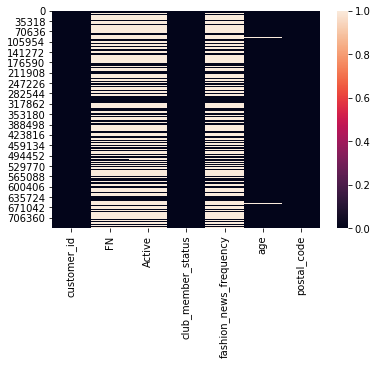

In [7]:
print(customers.isnull().sum())
sns.heatmap(customers.isnull())

In [32]:
#customers.fashion_news_frequency = customers.fashion_news_frequency.replace("NONE",np.nan)

In [33]:
for var in customers.columns:
    perc = round(customers[var].isnull().sum()/customers.shape[0]*100,2)
    print(f"About {perc}% of {var} are missing.")

About 0.0% of customer_id are missing.
About 61.34% of FN are missing.
About 62.0% of Active are missing.
About 0.15% of club_member_status are missing.
About 0.4% of fashion_news_frequency are missing.
About 0.62% of age are missing.
About 0.0% of postal_code are missing.


In [34]:
print(f"    club_member_status: {customers.club_member_status.unique()}")
print(f"fashion_news_frequency: {customers.fashion_news_frequency.unique()}")

    club_member_status: ['ACTIVE' 'PRE-CREATE' None 'LEFT CLUB']
fashion_news_frequency: ['NONE' 'Regularly' None 'Monthly']


In [35]:
# fashion_news_frequency: have None & NONE, where NONE has not been treated as missing values
perc = round(customers[(customers.fashion_news_frequency == 'NONE') | (customers.fashion_news_frequency.isnull())].shape[0]/customers.shape[0]*100,2)
print(f"About {perc}% of fashion_news_frequency are missing.")

About 61.23% of fashion_news_frequency are missing.


In [13]:
# FN & Active & fashion_news_frequency: over 50% are missing -> drop columns
customers = customers.drop(columns = ['FN','Active','fashion_news_frequency'])


# club_member_status: less than 1% are missing -> fillna with "Other"
customers.club_member_status.fillna('Other',inplace = True)

# age: less than 1% are missing -> fillna with mode/mean/median?
customers.age.fillna(customers.age.mode()[0], inplace=True)

#### 3.2. Get gender

In [14]:
articles.index_group_name.unique()

array(['Ladieswear', 'Sport', 'Baby/Children', 'Menswear', 'Divided'], dtype=object)

In [15]:
merge1 = transactions.merge(articles[['article_id','index_group_name']],on='article_id')[['customer_id','index_group_name']]

In [16]:
merge1.index_group_name.value_counts()

Ladieswear       5480032
Divided          1727478
Menswear          435270
Sport             324934
Baby/Children     135936
Name: index_group_name, dtype: int64

In [17]:
merge1.groupby('customer_id').index_group_name.apply(list)

customer_id
-9223352921020755230                                                                                                                                                                                                                                                                                                                                                                                                                                                                [Divided, Ladieswear]
-9223343869995384291                                                                                                                                                                                      [Ladieswear, Ladieswear, Ladieswear, Ladieswear, Ladieswear, Ladieswear, Ladieswear, Ladieswear, Ladieswear, Ladieswear, Ladieswear, Ladieswear, Ladieswear, Ladieswear, Ladieswear, Ladieswear, Sport, Ladieswear, Ladieswear, Ladieswear, Ladieswear, Sport, Sport, Sport, Sport, Ladieswear]
-9223295

In [18]:
mapping_weights = {'Ladieswear':2, 'Sport':0, 'Baby/Children':1.5, 'Menswear':1, 'Divided':0}
merge1['weights'] = merge1.index_group_name.map(mapping_weights)

merge2 = merge1.groupby('customer_id').weights.mean().reset_index()
merge2['gender'] = merge2.weights.map( lambda x: 'Female' if x >= 1.5 else 'Male')
customers = customers.merge(merge2[['customer_id','gender']], on='customer_id')

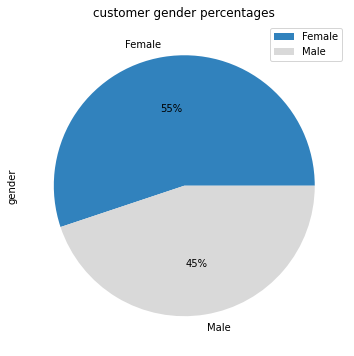

In [21]:
customers.gender.value_counts().plot.pie(title = "customer gender percentages",legend = True, labels=['Female','Male'],
                           autopct='%1.0f%%', fontsize=10, colormap = 'tab20c',figsize=(6,6))
None

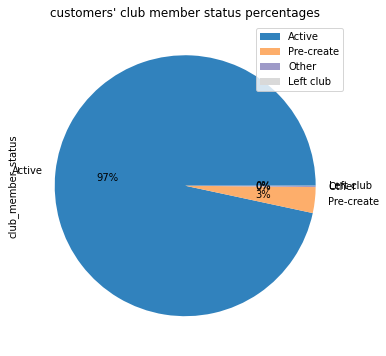

In [24]:
customers.club_member_status.value_counts().plot.pie(title = "customers' club member status percentages",legend = True, 
                                                     labels=['Active','Pre-create','Other','Left club'],
                                                     autopct='%1.0f%%', fontsize=10, 
                                                     colormap = 'tab20c',figsize=(6,6))
None

## Save Cleaned Data

In [42]:
#articles.to_csv('articles_20ss_cleaned.csv', index=False)            #   50,599 x 6
#customers.to_csv('customers_20ss_cleaned.csv', index=False)          #  741,661 x 4
#transactions.to_csv('transactions_20ss_cleaned.csv', index=False) 

In [67]:
articles.to_parquet('articles_20ss_cleaned.parquet', index=False)            #   50,599 x 6
customers.to_parquet('customers_20ss_cleaned.parquet', index=False)          #  741,661 x 4
transactions.to_parquet('transactions_20ss_cleaned.parquet', index=False)    #6,812,506 x 7